In [78]:
from zlib import crc32
import numpy as np

types = ['regression', 'classification']
datasets = {'regression': [{'name': 'Servo Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Servo'},
                           {'name': 'Forest Fires Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
                           {'name': 'Boston Housing Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'},
                           {'name': 'Diabetes Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'}],
            'classification': [{'name': 'Spambase Data Set',
                                'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'},
                               {'name': 'Wine Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine'},
                               {'name': 'Breast Cancer Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
                               {'name': 'MNIST',
                                'url': 'http://yann.lecun.com/exdb/mnist/'}]}
methods = {'regression': ['Линейная регрессия',
                          'Перцептрон',
                          'Надарая-Ватсона',
                          'SVR'],
           'classification': ['Логистическая регрессия',
                              'Перцептрон',
                              'k-ближайших соседей',
                              'Метод потенциальных функций',
                              'Метод Парзеновского окна',
                              'SVM']}
task = dict()
task['mail'] = 'karpov.ns@phystech.edu'
task['id'] = crc32(task['mail'].encode('utf-8'))
np.random.seed(task['id'])
task['type'] = np.random.choice(types)
task['dataset'] = np.random.choice(datasets[task['type']])
task['method'] = np.random.choice(
    methods[task['type']], size=3, replace=False).tolist()


task

{'mail': 'karpov.ns@phystech.edu',
 'id': 2116275946,
 'type': 'classification',
 'dataset': {'name': 'Breast Cancer Data Set',
  'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'},
 'method': ['Метод потенциальных функций',
  'Перцептрон',
  'Логистическая регрессия']}

#Requirements

In [79]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import expit
from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.linear_model import (LogisticRegression, LinearRegression)
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.metrics import classification_report
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score

from torchvision import datasets
from torchvision import transforms

from mlxtend.plotting import plot_decision_regions

#Выгрузка данных

In [80]:

data = load_breast_cancer()

In [81]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [82]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [83]:
data_df = pd.DataFrame(data = data.data,
                       columns = data.feature_names)


In [84]:
data_df.shape

(569, 30)

In [85]:
data_df.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
564           0.4107                0.2216          0.2060   
565           0.3215                0.1628          0.2572   
566           0.3403                0.1418          0.2218   
567           0.9387                0.2650          0.4087   
568           0.0000                0.0000          0.2871   

     worst fractal dimension  
564                  0.07115  
565                  0.06637  
566                  0.07820  
567                  0.12400  
568                  0.07039  

[5 rows x 30 columns]

#Начало работы с данными


---
1. множество объектов: опухоли на женских грудях, формально $X^l \in \mathbb{R}^{569 \times 30}$
---
2. размер выборки: 569
---
3. признаки, которыми описываются объекты: 30 вещественных признаков (сами признаки см. ниже)
---


In [86]:
data_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry             float64
worst fractal dimension    float64
dtype: object

---
4. множество ответов: $Y = \{0, 1\}$ : 1 -- доброкачественная опухоль (357 штук), 0 -- злокачественная  (212 штук)
---
5. тип задачи машинного обучения: В нашем случае, так как мощность множества
$|Y| = 2 << l = 569$ получаем задачу *классификации* на 2 класса
---

Для оценки качества модели будем использовать метрику $\mathrm{F1_{score}}$

$\mathrm{F1_{score}} = \frac{2 \cdot \mathrm{Precision} \cdot \mathrm{Recall}}{ \mathrm{Precision} + \mathrm{Recall}}$

Использование данной метрики позволяет лучше выбрать модель, которая не только точно классифицирует злокачественные случаи, но и минимизирует количество пропущенных злокачественных опухолей.

#Препроцессинг данных


## Z-преобразование данных

Выполним z преобразование $(\frac{x_i - \left< x\right>}{\sigma_x})$ над каждым значением каждого признака

In [87]:

# приведем все независимые переменные к единому масштабу

# снова создадим датафрейм без целевой переменной
cancer_df = pd.DataFrame(data.data, columns = data.feature_names)

# создадим объект этого класса
scaler = StandardScaler()

# приведем данные к единому масштабу
scaled_data = scaler.fit_transform(cancer_df)

# преобразуем scaled_data обратно в датафрейм
cancer_df_scaled = pd.DataFrame(scaled_data, columns = data.feature_names)

# вновь добавим целевую переменную
cancer_df_scaled['target'] = data.target

# посмотрим на результат
cancer_df_scaled.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564               -0.931027  ...       0.117700         1.752563    2.015301   
565               -1.058611  ...       2.047399         1.421940    1.494959   
566               -0.895587  ...       1.374854         0.579001    0.427906   
567                1.043695  ...       2.237926         2.303601    1.653171   
568               -0.561032  ...       0.764190        -1.432735   -1.075813   

     worst smoothness  worst compactness  worst concavity  \
564          0.378365          -0.273318         0.664512   
565         -0.691230          -0.394820         0.236573   
566         -0.809587           0.350735         0.326767   
567          1.430427           3.904848         3.197605   
568         -1.859019          -1.207552        -1.305831   

     worst concave points  worst symmetry  worst fractal dimension  target  
564              1.629151       -1.360158                -0.709091       0  
565              0.733827       -0.531855                -0.973978       0  
566              0.414069       -1.104549                -0.318409       0  
567              2.289985        1.919083                 2.219635       0  
568             -1.745063       -0.048138                -0.751207       1  

[5 rows x 31 columns]

In [88]:
# а также на основные статистическое показатели (среднее должно быть 0, дисперсия 1 для набора каждого признака)
cancer_df_scaled.describe().round(2)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
count       569.00        569.00          569.00     569.00           569.00   
mean         -0.00         -0.00           -0.00      -0.00             0.00   
std           1.00          1.00            1.00       1.00             1.00   
min          -2.03         -2.23           -1.98      -1.45            -3.11   
25%          -0.69         -0.73           -0.69      -0.67            -0.71   
50%          -0.22         -0.10           -0.24      -0.30            -0.03   
75%           0.47          0.58            0.50       0.36             0.64   
max           3.97          4.65            3.98       5.25             4.77   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count            569.00          569.00               569.00         569.00   
mean              -0.00           -0.00                 0.00          -0.00   
std                1.00            1.00                 1.00           1.00   
min               -1.61           -1.11                -1.26          -2.74   
25%               -0.75           -0.74                -0.74          -0.70   
50%               -0.22           -0.34                -0.40          -0.07   
75%                0.49            0.53                 0.65           0.53   
max                4.57            4.24                 3.93           4.48   

       mean fractal dimension  ...  worst texture  worst perimeter  \
count                  569.00  ...         569.00           569.00   
mean                    -0.00  ...           0.00            -0.00   
std                      1.00  ...           1.00             1.00   
min                     -1.82  ...          -2.22            -1.69   
25%                     -0.72  ...          -0.75            -0.69   
50%                     -0.18  ...          -0.04            -0.29   
75%                      0.47  ...           0.66             0.54   
max                      4.91  ...           3.89             4.29   

       worst area  worst smoothness  worst compactness  worst concavity  \
count      569.00            569.00             569.00           569.00   
mean         0.00             -0.00              -0.00             0.00   
std          1.00              1.00               1.00             1.00   
min         -1.22             -2.68              -1.44            -1.31   
25%         -0.64             -0.69              -0.68            -0.76   
50%         -0.34             -0.05              -0.27            -0.22   
75%          0.36              0.60               0.54             0.53   
max          5.93              3.96               5.11             4.70   

       worst concave points  worst symmetry  worst fractal dimension  target  
count                569.00          569.00                   569.00  569.00  
mean                  -0.00           -0.00                     0.00    0.63  
std                    1.00            1.00                     1.00    0.48  
min                   -1.75           -2.16                    -1.60    0.00  
25%                   -0.76           -0.64                    -0.69    0.00  
50%                   -0.22           -0.13                    -0.22    1.00  
75%                    0.71            0.45                     0.45    1.00  
max                    2.69            6.05                     6.85    1.00  

[8 rows x 31 columns]

##Визуальный анализ данных

In [89]:
cancer_df_scaled.cov()['target'].sort_values()

worst concave points      -0.384359
worst perimeter           -0.379200
mean concave points       -0.376148
worst radius              -0.376071
mean perimeter            -0.359691
worst area                -0.355424
mean radius               -0.353585
mean area                 -0.343392
mean concavity            -0.337277
worst concavity           -0.319478
mean compactness          -0.288927
worst compactness         -0.286246
radius error              -0.274688
perimeter error           -0.269363
area error                -0.265535
worst texture             -0.221298
worst smoothness          -0.204134
worst symmetry            -0.201630
mean texture              -0.201092
concave points error      -0.197633
mean smoothness           -0.173666
mean symmetry             -0.160075
worst fractal dimension   -0.156865
compactness error         -0.141912
concavity error           -0.122892
fractal dimension error   -0.037765
symmetry error             0.003159
texture error              0.004022
mean fractal dimension     0.006218
smoothness error           0.032459
target                     0.234177
Name: target, dtype: float64

Посмотрим, как отедляются точки при визуализации 4 наиболее коварирующих с целевой переменной параметров


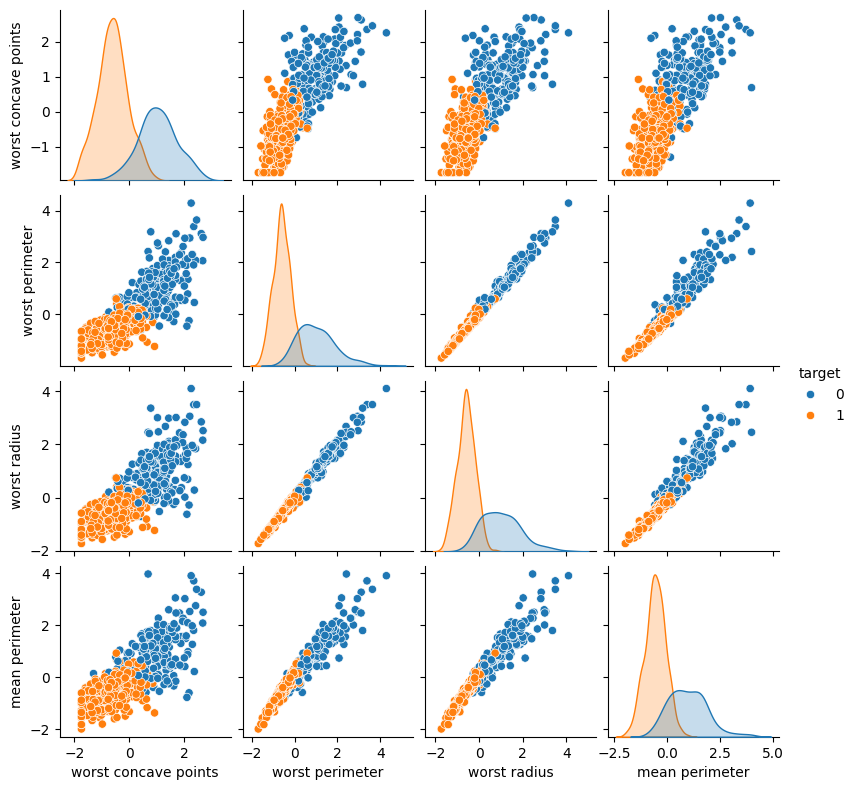

In [90]:
sns.pairplot(cancer_df_scaled[['worst concave points',	'worst perimeter',	'worst radius',	'mean perimeter', 'target']], hue='target', height=2)
plt.show()

##Генерируем тренировочную и  тестовую выборки

In [91]:
X = cancer_df_scaled.loc[:, cancer_df_scaled.columns != 'target']
y = cancer_df_scaled['target']

In [92]:
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


#Эксперимент для Логистической регрессии

##Максимизация правдободобия (logistic loss) с L1, L2 регуляризацией


$$Q(w) = \sum_{i = 1}^{l} \log(1 + \exp(- w^T x_i \cdot y_i)) + \frac{1}{C} \cdot 0.5 \cdot (1 - l1_{ratio}) \cdot \left\| w \right\|^2 + \frac{1}{C} \cdot l1_{ratio} \cdot  \left\| w \right\| \to \min_{w}$$

Запустим подбор гиперпараметров $C$ и $l1_{ratio}$ на 5-фолдовой кросс-валидации

In [93]:
clf = LogisticRegressionCV(cv=5, penalty='elasticnet', scoring='f1', solver='saga', max_iter=5000, l1_ratios=list(np.linspace(0, 1, 9))).fit(X_train, y_train)

In [94]:
print(f'оптимальное значение коэффициента C = {clf.C_[0]}')
print(f'Оптимальное значение коэффициента l1_ratio = {clf.l1_ratio_[0]}')

оптимальное значение коэффициента C = 2.782559402207126
Оптимальное значение коэффициента l1_ratio = 0.0


In [95]:
print('Значения коэффициентов итоговой модели')
print(*clf.coef_)

Значения коэффициентов итоговой модели
[-0.25723897 -0.21568419 -0.17833069 -0.38499856 -0.17169202  1.18947889
 -0.98831244 -1.67337956  0.48707722 -0.10209715 -1.79796486  0.31910823
 -0.57818352 -1.31645946 -0.23061229  0.60532969 -0.04889784 -0.73071924
  0.72799352  1.04818285 -1.0442112  -1.82831043 -0.50097293 -1.05498601
 -0.47178824  0.30862549 -1.37414888 -0.98897998 -1.68657509 -0.15126004]


##Оценим лучшую модель *логрегрессии*

In [126]:
log_f1_train = clf.scores_[1].mean(axis=0).max()
log_f1_test = clf.score(X_test, y_test)

print(f'F1 метрика на обучающей выборке = {log_f1_train}')
print(f'F1 метрика на тестовой выборке = {log_f1_test}')

F1 метрика на обучающей выборке = 0.980109725328178
F1 метрика на тестовой выборке = 0.986046511627907


#Перцептрон

In [97]:
class Perceptron(torch.nn.Module):
    @property
    def device(self):
        for p in self.parameters():
            return p.device

    def __init__(self, input_dim=30, num_layers=0,
                 hidden_dim=64, output_dim=2, p=0.0):
        super(Perceptron, self).__init__()

        self.layers = torch.nn.Sequential()

        prev_size = input_dim
        for i in range(num_layers):
            self.layers.add_module('layer{}'.format(i),
                                  torch.nn.Linear(prev_size, hidden_dim))
            self.layers.add_module('relu{}'.format(i), torch.nn.ReLU())
            self.layers.add_module('dropout{}'.format(i), torch.nn.Dropout(p=p))
            prev_size = hidden_dim

        self.layers.add_module('classifier',
                               torch.nn.Linear(prev_size, output_dim))

    def forward(self, input):
        return self.layers(input)

In [98]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [99]:
def testing(model, dataset):
    generator = torch.utils.data.DataLoader(dataset, batch_size=64)

    pred = []
    real = []
    for x, y in generator:
        x = x.view([-1, 30]).to(device)
        y = y.to(device)

        pred.extend(torch.argmax(model(x), dim=-1).cpu().numpy().tolist())
        real.extend(y.cpu().numpy().tolist())

    return np.mean(np.array(real) == np.array(pred)), \
           classification_report(real, pred)

In [100]:
def trainer(model, dataset, loss_function, optimizer, epochs):
    for epoch in tqdm(range(epochs), leave=False):
        generator = torch.utils.data.DataLoader(dataset, batch_size=64,
                                              shuffle=True)
        for x, y in tqdm(generator, leave=False):
            optimizer.zero_grad()
            x = x.view([-1, 30]).to(device)
            y = y.to(device)

            output = model(x)
            loss = loss_function(output, y)
            loss.backward()
            optimizer.step()

In [101]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

In [102]:
class MyDataset():
  def __init__(self, X, y):
    self.X = torch.Tensor(X)
    self.y = torch.from_numpy(y)

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, index):
    return (self.X[index], self.y[index])


train_dataset = MyDataset(X_train_np, y_train_np)
test_dataset = MyDataset(X_test_np, y_test_np)

## Гиперпараметры

 В качестве гиперпараметров имеем: количество слоёв, размерность скрытых слоёв, вероятность отключения нейрона

In [103]:
cross_val = KFold(3)
number_of_batch = cross_val.get_n_splits(X_train_np)

grid = ParameterGrid({'num_layers': [1, 2],
                      'hidden_dim': [16, 32, 64],
                      'p': [0.2, 0.3, 0.4, 0.7],
                      'lr': [0.001]})


Кросс-валидация будет проведена на 3 фолдах

In [104]:
scores = pd.DataFrame({'hidden_dim' : [], 'lr':[], 'num_layers':[], 'p':[], 'f1':[]})

for item in tqdm(grid):
    list_of_scores = []
    for train_index, test_index in tqdm(cross_val.split(X_train),
                                        total=number_of_batch, leave=False):
        x_train_fold =  X_train_np[train_index]
        x_test_fold = X_train_np[test_index]

        y_train_fold = y_train_np[train_index]
        y_test_fold = y_train_np[test_index]


        traindata = MyDataset(x_train_fold, y_train_fold)
        testdata = MyDataset(x_test_fold, y_test_fold)

        model = Perceptron(num_layers=item['num_layers'], p=item['p'],
                           hidden_dim=item['hidden_dim'])
        model.to(device)
        _ = model.train()
        trainer(model=model,
                dataset=traindata,
                loss_function=torch.nn.CrossEntropyLoss(),
                optimizer=torch.optim.Adam(model.parameters(), lr=item['lr']),
                epochs=4)

        _ = model.eval()
        acc, report = testing(model, testdata)
        list_of_scores.append(float(report.split()[-2]))

    tmp = item
    tmp['f1'] = np.mean(list_of_scores)

    scores = scores._append(tmp, ignore_index = True)

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [105]:
scores.sort_values(by=['f1'], ascending=False)

hidden_dim     lr  num_layers    p        f1
23        64.0  0.001         2.0  0.7  0.936667
8         32.0  0.001         1.0  0.2  0.933333
21        64.0  0.001         2.0  0.3  0.933333
22        64.0  0.001         2.0  0.4  0.926667
17        64.0  0.001         1.0  0.3  0.926667
14        32.0  0.001         2.0  0.4  0.923333
20        64.0  0.001         2.0  0.2  0.920000
18        64.0  0.001         1.0  0.4  0.920000
16        64.0  0.001         1.0  0.2  0.920000
2         16.0  0.001         1.0  0.4  0.913333
19        64.0  0.001         1.0  0.7  0.910000
12        32.0  0.001         2.0  0.2  0.893333
9         32.0  0.001         1.0  0.3  0.876667
11        32.0  0.001         1.0  0.7  0.866667
15        32.0  0.001         2.0  0.7  0.860000
5         16.0  0.001         2.0  0.3  0.860000
1         16.0  0.001         1.0  0.3  0.856667
10        32.0  0.001         1.0  0.4  0.843333
0         16.0  0.001         1.0  0.2  0.833333
13        32.0  0.001         2.0  0.3  0.826667
3         16.0  0.001         1.0  0.7  0.806667
4         16.0  0.001         2.0  0.2  0.653333
6         16.0  0.001         2.0  0.4  0.526667
7         16.0  0.001         2.0  0.7  0.443333

## Оценим лучшую из моделей перцептрона

In [106]:
best_params = dict(scores.sort_values(by=['f1'], ascending=False).iloc[0])

In [107]:
best_model = Perceptron(num_layers=int(best_params['num_layers']), p=float(best_params['p']),
                           hidden_dim=int(best_params['hidden_dim']))
best_model.to(device)
_ = best_model.train()
trainer(model=best_model,
                dataset=MyDataset(X_train_np, y_train_np),
                loss_function=torch.nn.CrossEntropyLoss(),
                optimizer=torch.optim.Adam(best_model.parameters(), lr=0.001),
                epochs=4)

_ = best_model.eval()

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [108]:
testdata = MyDataset(X_test_np, y_test_np)
acc, report = testing(best_model, testdata)


neiro_train_f1 = best_params['f1']
neiro_test_f1 = float(report.split()[-2])

print(f'F1 метрика на обучающей выборке = {neiro_train_f1}')
print(f'F1 метрика на тестовой выборке = {neiro_test_f1}')

F1 метрика на обучающей выборке = 0.9366666666666666
F1 метрика на тестовой выборке = 0.94


#Потенциальные функции

$a(x, X^l) = \mathrm{sign} \sum_{ i =1}^{l} \gamma_i \cdot y_i  \cdot K(\frac{\rho(x, x_i)}{h_i})$

$K(r) = (1 - r^2)^2 \cdot  [r \leq 1 ]$

In [109]:
class PFM(object):
    def __init__(self, kernel=None):
        self.X, self.Y, self.gams = None, None, None
        self.kernel = lambda x: np.ones_like(x)
        if kernel is not None:
            self.kernel = kernel
    def scores(self, X):
        features = self.gams*self.kernel(cdist(X, self.X))
        scores = np.vstack(
            [np.sum(features.T[np.where(self.Y==0)[0]].T, axis=-1),
             np.sum(features.T[np.where(self.Y==1)[0]].T, axis=-1)]).T
        return scores
    def predict(self, X):
        return np.argmax(self.scores(X), axis=-1)
    def fit(self, X, Y, epoch=10):
        self.X, self.Y, self.gams = np.array(X), np.array(Y), np.zeros_like(Y)
        for _ in range(epoch):
            for i, (x, y) in enumerate(zip(self.X, self.Y)):
                if self.predict(np.array([x]))[0] != y:
                    self.gams[i] += 1

In [110]:
def K(distance, h=0.05):
    ret = np.array(distance) / h
    return (1 - ret**2)**2 * (np.abs(ret) <= 1)

In [111]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

## Проведём кросс-валидацию на 3 фолдах



In [112]:
cross_val = KFold(3)
number_of_batch = cross_val.get_n_splits(X_train_np)


In [113]:
scores_pfm = pd.DataFrame({'h':[], 'f1_train':[]})

#for i, h in enumerate([0.05, 0.2, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0, 100, 1000.0, 10000.0, 100000.0]):

for i, h in enumerate(np.linspace(10, 30, 50)):
  scores_arr = []

  for train_index, test_index in tqdm(cross_val.split(X_train),
                                        total=number_of_batch, leave=False):
        x_train_fold =  X_train_np[train_index]
        x_test_fold = X_train_np[test_index]

        y_train_fold = y_train_np[train_index]
        y_test_fold = y_train_np[test_index]

        model = PFM(kernel=lambda x: K(x, h=h))
        model.fit(x_train_fold, y_train_fold)


        scores_arr.append(f1_score(y_test_fold, model.predict(x_test_fold)))

  scores_pfm = scores_pfm._append({'h':h, 'f1_train':np.mean(scores_arr)}, ignore_index=True)


scores_pfm.sort_values(by=['f1_train'], ascending=False)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:01<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

h  f1_train
11  14.489796  0.981613
31  22.653061  0.979524
15  16.122449  0.977729
28  21.428571  0.977636
39  25.918367  0.977552
25  20.204082  0.977456
41  26.734694  0.977454
43  27.551020  0.977354
16  16.530612  0.977326
22  18.979592  0.975866
36  24.693878  0.975604
35  24.285714  0.975521
14  15.714286  0.973995
23  19.387755  0.973622
13  15.306122  0.973269
5   12.040816  0.973251
9   13.673469  0.973251
18  17.346939  0.972819
42  27.142857  0.972440
24  19.795918  0.972057
0   10.000000  0.971897
8   13.265306  0.971670
30  22.244898  0.971601
37  25.102041  0.969990
38  25.510204  0.969898
33  23.469388  0.969898
29  21.836735  0.969852
17  16.938776  0.969802
48  29.591837  0.969565
6   12.448980  0.969339
4   11.632653  0.968852
45  28.367347  0.967926
20  18.163265  0.967912
7   12.857143  0.967678
49  30.000000  0.967325
2   10.816327  0.966982
3   11.224490  0.966825
10  14.081633  0.966083
32  23.061224  0.964854
47  29.183673  0.962417
46  28.775510  0.961928
12  14.897959  0.959767
1   10.408163  0.958053
34  23.877551  0.954731
44  27.959184  0.954555
26  20.612245  0.954406
19  17.755102  0.953957
21  18.571429  0.950779
27  21.020408  0.944456
40  26.326531  0.941087

##Оценим лучшую из моделей

In [114]:
best_params_pfm = dict(scores_pfm.sort_values(by=['f1_train'], ascending=False).iloc[0])

In [129]:
best_model = PFM(kernel=lambda x: K(x, h=best_params_pfm['h']))
best_model.fit(X_train_np, y_train_np)

pmf_train_f1 = best_params_pfm['f1_train']
pmf_test_f1 = f1_score(y_test_np, best_model.predict(X_test_np))

print(f'F1 метрика на обучающей выборке = {pmf_train_f1}')
print(f'F1 метрика на тестовой выборке = {pmf_test_f1}')

F1 метрика на обучающей выборке = 0.9816134657248212
F1 метрика на тестовой выборке = 0.9619047619047619


#Выводы

Таблица с оценками моделей

In [130]:
total_scores = pd.DataFrame({'type':['Логрегрессия', 'Перцептрон', 'Потенциальные функции'], 'f1_train':[log_f1_train,neiro_train_f1,pmf_train_f1], 'f1_test':[log_f1_test,neiro_test_f1,pmf_test_f1]})
total_scores

type  f1_train   f1_test
0           Логрегрессия  0.980110  0.986047
1             Перцептрон  0.936667  0.940000
2  Потенциальные функции  0.981613  0.961905

Лучшим результатом, согласно таблице, оказался алгоритм Л*огистической регрессии*. \\
Это может быть связано с тем, что для реализации этого алгоритма имелись готовые библиотеки, в отличие от *Перцептрона* и *Потенциальных функций*. \\


Заметим, что перцептрон имеет худший показатель в f1_train, эта метрика отвечает за оценку качества обучения с учётом K-Fold кросс-валидации. Это может означать, что перцептрон сильнее подвержен переобучению нежели *Логистическая регресия* и метод *Потенциальных функций*

**С какими проблемами столкнулись:** Были получены 3 различных числа-метрики для каждой модели, однако не совсем понятно, вызваны эти отличия на  $\approx$ 0.2 балла случайностью или действительно демонстрируют преимущество одного алгоритма над другим. \\
Также при реализации потенциальных функций не удалось подобрать $h_i$ для каждого элемента обучающей выборки, поэтому пришлось выбирать общий $h=h_i \;\; \forall i$